/var/folders/pd/h_st5vp94x79nl2vgmmgwrt40000gn/T/ipykernel_62437/2193326870.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  scores = df.applymap(lambda x: kurtosis_based_score(x, mean_volume, std_dev_volume, scale_factor=1.0))


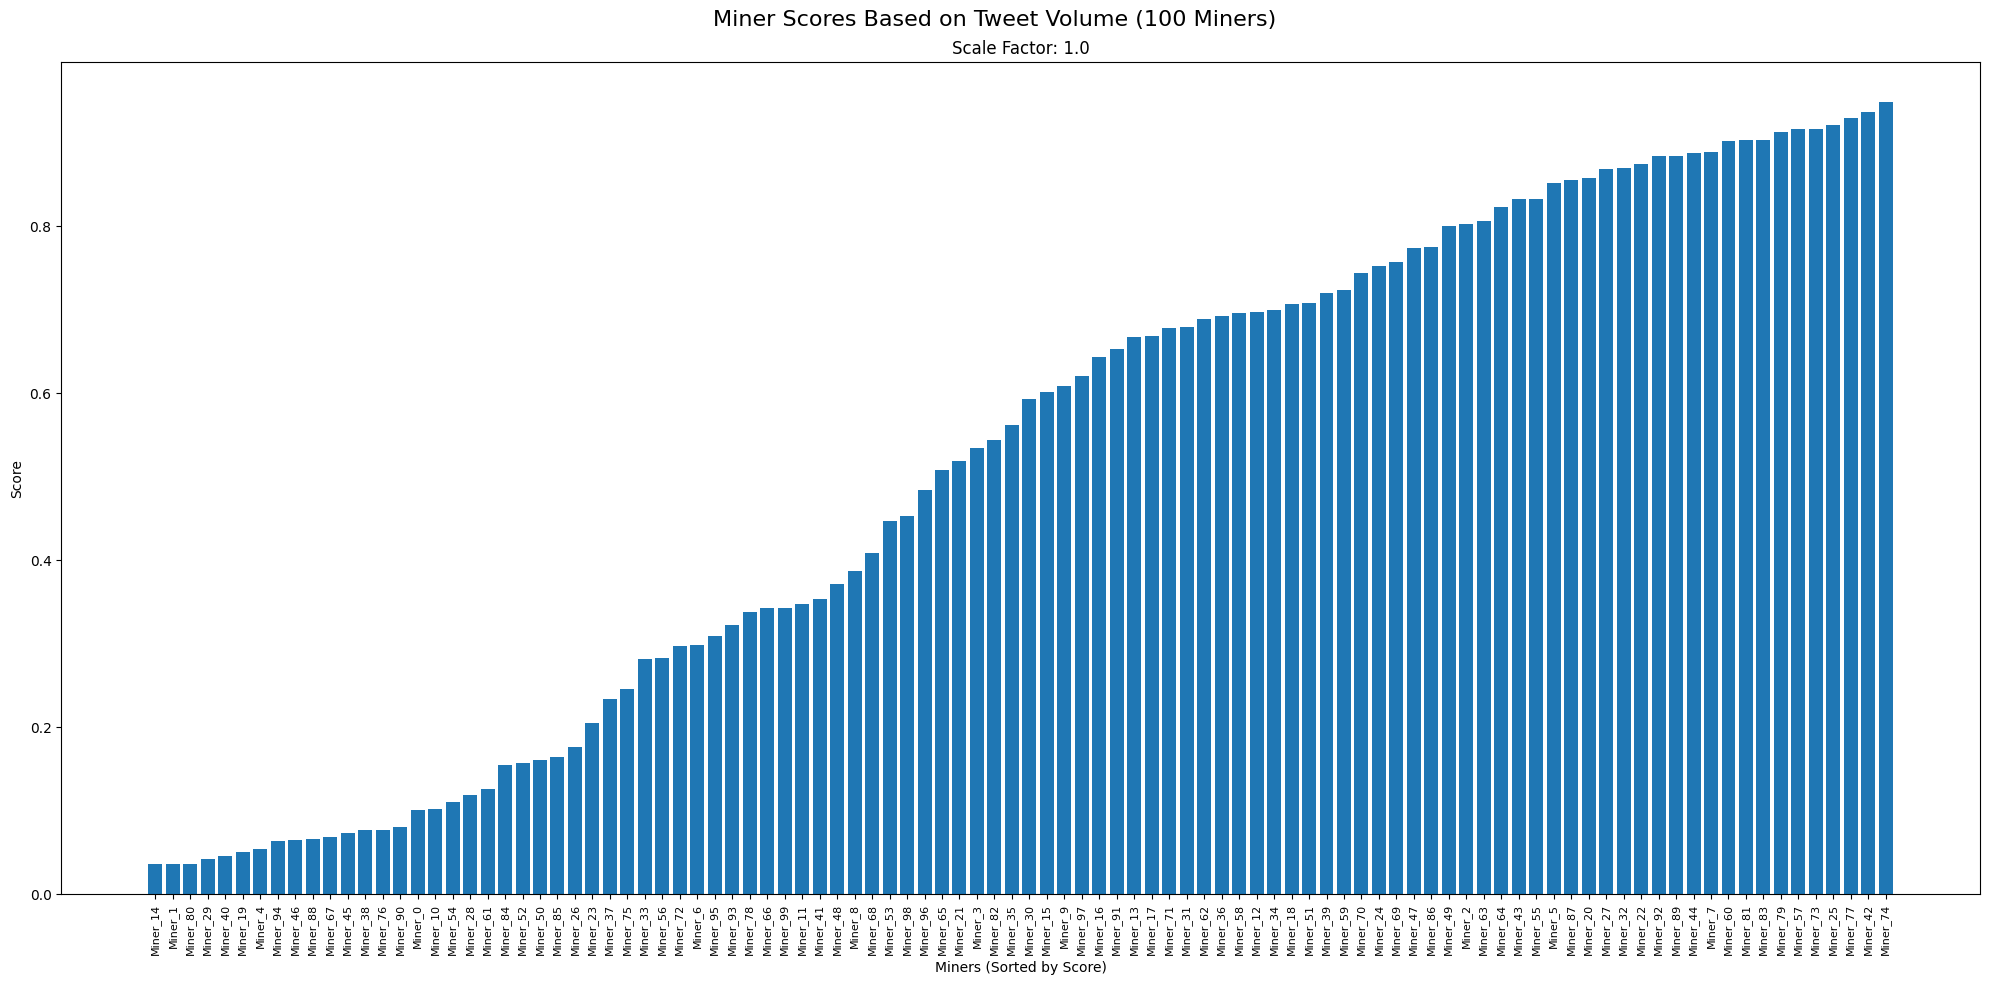

          Total Volume  Score (scale=1.0)
Miner_74         99399           0.948815
Miner_42         96376           0.936775
Miner_77         94763           0.929504
Miner_25         93116           0.921434
Miner_73         92193           0.916614
...                ...                ...
Miner_40          3990           0.045766
Miner_29          2847           0.042069
Miner_80          1116           0.036936
Miner_1            960           0.036499
Miner_14           869           0.036247

[100 rows x 2 columns]


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Simulation parameters
num_miners = 100
min_tweets = 100
max_tweets = 100000

# Generate synthetic data with random volumes
np.random.seed(42)  # For reproducibility
volumes = np.random.randint(min_tweets, max_tweets, num_miners)
miner_data = {f"Miner_{i}": volume for i, volume in enumerate(volumes)}
df = pd.DataFrame(miner_data, index=[0])

# Scoring function
def kurtosis_based_score(volume, mean, std_dev, scale_factor=1.0):
    return 0 if std_dev == 0 else stats.norm.cdf((volume - mean) / std_dev) * scale_factor

# Calculate scores using a scale factor of 1.0
mean_volume = df.mean(axis=1).values[0]
std_dev_volume = df.std(axis=1).values[0]
scores = df.applymap(lambda x: kurtosis_based_score(x, mean_volume, std_dev_volume, scale_factor=1.0))

# Plotting
fig, ax = plt.subplots(figsize=(20, 10))
fig.suptitle("Miner Scores Based on Tweet Volume (100 Miners)", fontsize=16)

sorted_scores = scores.T[0].sort_values(ascending=False)
ax.bar(range(len(sorted_scores))[::-1], sorted_scores.values)
ax.set_title("Scale Factor: 1.0")
ax.set_xlabel("Miners (Sorted by Score)")
ax.set_ylabel("Score")
ax.set_xticks(range(len(sorted_scores))[::-1])
ax.set_xticklabels(sorted_scores.index, rotation=90, ha='center', fontsize=8)

plt.tight_layout()
plt.show()

# Display data
result_df = pd.DataFrame({"Total Volume": df.T[0], "Score (scale=1.0)": scores.T[0]}).sort_values("Score (scale=1.0)", ascending=False)
print(result_df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f017507a-86ad-40cb-8efa-5587c78ee158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>